# Clean Text Manually and with NLTK

If the file contains header and footer information that we are not interested in, specifically copyright and license information. Open the file and delete the header and footer information and save the file as filname_clean.txt.

Text Cleaning Is Task Specific:
    eg:
        It's plain text so there is no markup to parse (yay!).
        The lines are artificially wrapped with new lines at about 70 characters (meh).
        There are no obvious typos or spelling mistakes.
        There's punctuation like commas, apostrophes, quotes, question marks, and more.
        There' s hyphenated descriptions like armour-like.
        There's a lot of use of the em dash (-) to continue sentences (maybe replace with commas?).
        There are names (e.g. Mr. Samsa)
        There does not appear to be numbers that require handling (e.g. 1999)
        There are section markers (e.g. II and III ).

In [1]:
# Manual Tokenization and Cleaning
import pandas as pd
fileName="true.csv"
real = pd.read_csv(fileName)
words=real["text"][0].split()
#print(words)

# use the regex model (re) and split the document into words by 
# selecting for strings of alphanumeric characters (a-z, A-Z, 0-9 and ` '). 
# It will not pick up other charaters like $ from our example
import re
words =re.split(r'\W+',  real["text"][0])
#print(words)

# remove punctuation using string.puctuation constant 
import string
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
stripped = [re_punc.sub('', w).lower() for w in words]
print (stripped)


['washington', 'reuters', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'u', 's', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'u', 's', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues', 'such', 'as', 'immigration', 'policy', 'even', 'as', 'the'

## Tokenization and Cleaning with NLTK
NLTK = Natural Language Toolkit
use pip install nltk
After installation, you will need to install the data used with the library, including a great
set of documents that you can use later for testing other tools in NLTK.
use below commands to do it via UI or for command line use this command "python -m nltk.downloader all"
nltk.download()


In [2]:
import nltk
import pandas as pd
fileName="true.csv"
real = pd.read_csv(fileName)
# Split into Sentences
# A good useful first step is to split the text into sentences. Some modeling tasks prefer input
# to be in the form of paragraphs or sentences, such as Word2Vec. You could first split your
# text into sentences, split each sentence into words, then save each sentence to file, one per line.
# NLTK provides the sent tokenize() function to split text into sentences.
from nltk import sent_tokenize
sentences = sent_tokenize(real["text"][0])
print(sentences)

['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018.', 'In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January.', 'When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress.', 'President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that supp

Displaying 7 of 7 matches:
ntrol of Congress . President Donald Trump and his Republicans want a big budge
d environmental protection . “ The ( Trump ) administration has already been wi
legally to the country as children . Trump in September put a March 2018 expira
 clean , ” she said . On Wednesday , Trump aides will meet with congressional l
y a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and
an. 6 and 7 , the White House said . Trump was also scheduled to meet on Sunday
ed the $ 44 billion requested by the Trump administration . The Senate has not 
['WASHINGTON', 'Reuters', 'The', 'head', 'of', 'a', 'conservative', 'Republican', 'faction', 'in', 'the', 'Congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'Sunday', 'and', 'urged', 'budget', 'restraint', 'in', 'In', 'keeping', 'with', 'a', 'sharp', 'pivot', 

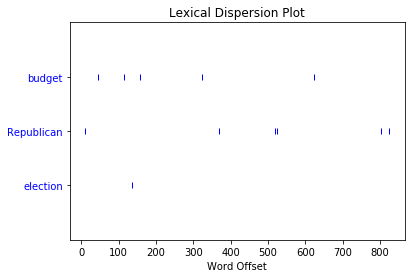

In [75]:
#Split into Words
from nltk.tokenize import word_tokenize

tokens = word_tokenize(real["text"][0])

trueText=Text(tokens) #This method of converting raw strings to NLTK Text instances can be used when reading text from a file.

# concordance() is a method of the Text class of NLTK. It finds words and displays a context window. Word matching is not case-sensitive.
# concordance() is defined as follows: concordance(self, word, width=79, lines=25). Note default values for optional params.
trueText.concordance('Trump')

# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

print(trueText.count('Trump'))
print(trueText.index('Trump'))

trueText.similar('Republican')

#This plot is helpful to determine the location of a word in a sequence of text sentences.
trueText.dispersion_plot(['budget', 'Republican', 'election'])



Using a stronger/longer list of stopwords
We can combine the stopwords we have in NLTK with other stopwords list we find online.

Personally, I like to use stopword-json because it has stopwrds in 50 languages
https://github.com/6/stopwords-json

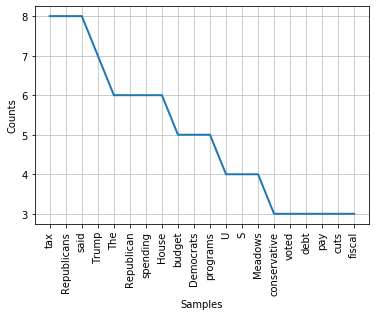

{"you've", 'too', 'doing', 'no', 'him', '+', "mustn't", '-', 'did', 'himself', 'a', 'having', 'was', 's', 'll', 'has', 'into', 'only', 'haven', 'itself', "you'll", "shan't", 'ma', 'through', 'few', 'more', 'its', "you'd", 'are', 'not', 'hasn', 'under', '#', 'again', 'before', '}', 'further', 'will', 'then', 'an', 'if', "wasn't", '(', 'been', 'over', "'", 'them', 'up', 'don', '{', 'some', "shouldn't", "hadn't", 'shouldn', '*', 'now', 'or', 'any', 'on', 'very', 'each', 'yours', '"', "it's", '?', 'am', 'is', '$', 'me', 'what', 'during', '!', 'there', '%', 'aren', "weren't", 'my', 'do', 'off', '@', 'who', 'ours', 'by', ';', 'which', 'needn', 'mustn', 'have', 'herself', 'with', 'hers', '&', 'from', "needn't", 'in', 'how', 'shan', 'theirs', 'she', 'he', 'down', 'ain', 'couldn', 'o', 'didn', 'against', 'doesn', '~', "mightn't", 'wouldn', 'same', 'were', 'these', '<', 'above', 'had', 'weren', 'once', '[', 'can', "haven't", 'those', 'being', 'own', 'all', ':', 'we', 'they', 'to', 've', 'you', '

In [3]:
#Filter out Stop Words (and Pipeline)
from nltk.corpus import stopwords
from nltk.text import Text

stop_words = stopwords.words('english')
#print(stop_words)
words = [w for w in words if not w in stop_words]
#print(words[:100])
trueText=Text(words)
trueText.plot(20)  # plots 20 most common tokens


#Combining the punctuation with the stopwords from NLTK
from string import punctuation
stopwords_en = set(stopwords.words('english'))
stopwords_en_withpunct = stopwords_en.union(set(punctuation))
print(stopwords_en_withpunct)
wordsLower=[word.lower() for word in words if word not in stopwords_en_withpunct]
print(wordsLower[:100])



Using a stronger/longer list of stopwords
We can combine the stopwords we have in NLTK with other stopwords list we find online.

Personally, I like to use stopword-json because it has stopwrds in 50 languages =)
https://github.com/6/stopwords-json

In [7]:
# use to find bigrams, which are pairs of words 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 
biagram_collocation = BigramCollocationFinder.from_words(wordsLower) 
biagrams=biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15) 
print (biagrams)

#working with triplets instead of pairs
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures 
stopset = set(stopwords.words('english')) 
filter_stops = lambda w: len(w) < 4 or w in stopset
trigram_collocation = TrigramCollocationFinder.from_words(wordsLower)
trigram_collocation.apply_word_filter(filter_stops) 
#trigram_collocation.apply_freq_filter(3) 

trigrams=trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 10)
print (trigrams)
trueText.vocab()



[('u', 's'), ('non', 'defense'), ('1', '5'), ('crowley', 'said'), ('tax', 'overhaul'), ('2018', 'in'), ('5', 'trillion'), ('national', 'debt'), ('defense', 'discretionary'), ('fiscal', 'conservative'), ('trump', 'administration'), ('among', 'republicans'), ('tax', 'bill'), ('s', 'representative'), ('federal', 'budget')]
[('defense', 'discretionary', 'spending'), ('come', 'crowley', 'said'), ('joseph', 'crowley', 'said'), ('expansion', 'national', 'debt'), ('crowley', 'said', 'republican'), ('crowley', 'said', 'republicans'), ('trillion', 'national', 'debt'), ('called', 'fiscal', 'conservative'), ('requested', 'trump', 'administration'), ('trump', 'administration', 'already')]


FreqDist({'tax': 8, 'Republicans': 8, 'said': 8, 'Trump': 7, 'The': 6, 'Republican': 6, 'spending': 6, 'House': 6, 'budget': 5, 'Democrats': 5, ...})

#### Stem Words
Stemming refers to the process of reducing each word to its root or base. For example fishing,
fished, fisher all reduce to the stem fish. Some applications, like document classification, may
benefit from stemming in order to both reduce the vocabulary and to focus on the sense or
sentiment of a document rather than deeper meaning. There are many stemming algorithms,
although a popular and long-standing method is the Porter Stemming algorithm. This method
is available in NLTK via the PorterStemmer class.

The stemming and lemmatization process are hand-written regex rules written find the root word.

Stemming: Trying to shorten a word with simple regex rules

Lemmatization: Trying to find the root word with linguistics rules (with the use of regexes)

In [8]:
# stemming of words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]
print(stemmed[:100])

['washington', 'reuter', 'the', 'head', 'conserv', 'republican', 'faction', 'U', 'S', 'congress', 'vote', 'month', 'huge', 'expans', 'nation', 'debt', 'pay', 'tax', 'cut', 'call', 'fiscal', 'conserv', 'sunday', 'urg', 'budget', 'restraint', '2018', 'In', 'keep', 'sharp', 'pivot', 'way', 'among', 'republican', 'U', 'S', 'repres', 'mark', 'meadow', 'speak', 'cb', 'face', 'nation', 'drew', 'hard', 'line', 'feder', 'spend', 'lawmak', 'brace', 'battl', 'januari', 'when', 'return', 'holiday', 'wednesday', 'lawmak', 'begin', 'tri', 'pass', 'feder', 'budget', 'fight', 'like', 'link', 'issu', 'immigr', 'polici', 'even', 'novemb', 'congression', 'elect', 'campaign', 'approach', 'republican', 'seek', 'keep', 'control', 'congress', 'presid', 'donald', 'trump', 'republican', 'want', 'big', 'budget', 'increas', 'militari', 'spend', 'democrat', 'also', 'want', 'proport', 'increas', 'non', 'defens', 'discretionari', 'spend', 'program', 'support']


Lemmatization with NLTK. Lemmatization is the process of grouping together the different inflected forms of a word 
    so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words.

In [9]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

for word in ['walking', 'walks', 'walked']:
    print(wnl.lemmatize(word))

walking
walk
walked


The lemmatizer is actually pretty complicated, it needs Parts of Speech (POS) tags.
Lets see how to "whip" the lemmatizer to do what you need.

By default, the WordNetLemmatizer.lemmatize() function will assume that the word is a Noun 
if there's no explict POS tag in the input.

First you need the pos_tag function to tag a sentence and using the tag convert it into WordNet tagsets and
then put it through to the WordNetLemmatizer.

Note: Lemmatization won't really work on single words alone without context or knowledge of its POS tag 
    (i.e. we need to know whether the word is a noun, verb, adjective, adverb)

In [12]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' # if mapping isn't found, fall back to Noun.
    
# `pos_tag` takes the tokenized sentence as input, i.e. list of string,
# and returns a tuple of (word, tg), i.e. list of tuples of strings
# so we need to get the tag from the 2nd element.

walking_tagged = pos_tag(word_tokenize('He is walking to school'))
print(walking_tagged)
[wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in walking_tagged]

[('He', 'PRP'), ('is', 'VBZ'), ('walking', 'VBG'), ('to', 'TO'), ('school', 'NN')]


['he', 'be', 'walk', 'to', 'school']

In [19]:
#Now, lets create a new lemmatization function for sentences given what we learnt above.
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]

lemmatize_sent('He is walking to school')
print(real["text"][0], '\n')
print('Lemmatized and removed stopwords:')
print([word for word in lemmatize_sent(real["text"][0]) 
       if word not in stop_words
       and not word.isdigit() ])

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educati

In [31]:
def preprocess_text(text):
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    stopwords_en = set(stopwords.words('english'))
    stopwords_en_withpunct = stopwords_en.union(set(punctuation))
    return [word for word in lemmatize_sent(text) 
            if word not in stopwords_en_withpunct and word.isalpha()]

wordsPreprocessed=preprocess_text(real["text"][0])
print(wordsPreprocessed)

['washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'vote', 'month', 'huge', 'expansion', 'national', 'debt', 'pay', 'tax', 'cut', 'call', 'fiscal', 'conservative', 'sunday', 'urge', 'budget', 'restraint', 'keep', 'sharp', 'pivot', 'way', 'among', 'republican', 'representative', 'mark', 'meadow', 'speak', 'cbs', 'face', 'nation', 'draw', 'hard', 'line', 'federal', 'spending', 'lawmaker', 'brace', 'battle', 'january', 'return', 'holiday', 'wednesday', 'lawmaker', 'begin', 'try', 'pass', 'federal', 'budget', 'fight', 'likely', 'link', 'issue', 'immigration', 'policy', 'even', 'november', 'congressional', 'election', 'campaign', 'approach', 'republican', 'seek', 'keep', 'control', 'congress', 'president', 'donald', 'trump', 'republican', 'want', 'big', 'budget', 'increase', 'military', 'spending', 'democrat', 'also', 'want', 'proportional', 'increase', 'discretionary', 'spending', 'program', 'support', 'education', 'scientific', 'research', 'infrastructu

#### Handling large documents and large collections of text documents that do not fit into memory.
Extracting text from markup like HTML, PDF, or other structured document formats.
Transliteration of characters from other languages into English.
Decoding Unicode characters into a normalized form, such as UTF8.
Handling of domain specific words, phrases, and acronyms.
Handling or removing numbers, such as dates and amounts.
Locating and correcting common typos and misspellings.